In [1]:
# import necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
# set display options
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 500)

In [17]:
# read in the data
wine = pd.read_csv("./datasets/winequalityN.csv")

In [18]:
# check if data has been loaded correctly
wine.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [19]:
# Create a copy of the dataset 
wine_copy = wine.copy()

In [20]:
# check the shape of the data
wine.shape

(6497, 13)

#### Initial Observations:
* There seems to be duplicated values in the data e.g observation 3 and 4

### Data Exploration

#### Questions to answer
* What's the average composition (median) of the physicochemical properties in red and white wines?

* Can we identify or classify a wine as red or white based on the physicochemical properties

* How do the the physicochemical properties relate with one another and how do they ultimately influence the wine quality

* With concerns on high chloride content (saltiness) and negative impact of sulphites, how do these affect the quality of the wine

* What's the portion of FSO2 in TSO2 and how does it affect other physicochemical properties esp (pH, acidity) and quality

* What physicochemical properties or their combinations define quality wine


#### Data cleaning

In [21]:
# Check for null values
total_nulls = wine.isnull().sum()
total_observations = wine.shape[0]

null_percentages = total_nulls[total_nulls > 0] / total_observations * 100
total_nulls = total_nulls[total_nulls > 0]

pd.concat([total_nulls, null_percentages], axis=1, keys=["Total", "Percentage"]).sort_values(by="Total", ascending=False)

,Total,Percentage
fixed acidity,10,0.153917
pH,9,0.138525
volatile acidity,8,0.123134
sulphates,4,0.061567
citric acid,3,0.046175
residual sugar,2,0.030783
chlorides,2,0.030783


#### Observation
* The above columns have null values but none of them has a worrying portion of null values. We'll therefore impute the values using the median of the columns

In [22]:
null_cols = ["fixed acidity", "pH", "volatile acidity", "sulphates", "citric acid", "residual sugar", "chlorides"]

#### Impute null values

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
# Fill nulls with the median of the column
median_imputer = SimpleImputer(strategy="median")

for col in null_cols:
    wine[col] = median_imputer.fit_transform(wine[col].values.reshape(-1,1)) 

In [25]:
# Check to ensure nulls were imputed
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Check for duplicates

In [30]:
# Check for duplicates and keep the first instance
duplicates_index = wine[wine.duplicated(keep="first")].index
duplicates_index

Int64Index([   4,    5,    7,    8,   39,   48,   61,   63,   74,   75,
            ...
            6418, 6420, 6455, 6458, 6459, 6461, 6462, 6465, 6479, 6494],
           dtype='int64', length=1168)

In [31]:
# Drop the duplicated indexes
wine.drop(duplicates_index, axis=0, inplace=True)

In [32]:
# Check to confirm no duplicates
wine[wine.duplicated(keep="first")]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [33]:
# Check the new shape of the data
wine.shape

(5329, 13)

In [34]:
wine.sample(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1927,white,7.1,0.250,0.28,1.6,0.052,46.0,169.0,0.99260,3.05,0.41,10.5,5
722,white,6.9,0.310,0.34,1.6,0.032,23.0,128.0,0.99170,3.37,0.47,11.7,6
1713,white,6.6,0.340,0.27,6.2,0.059,23.0,136.0,0.99570,3.30,0.49,10.1,6
564,white,6.8,0.510,0.30,4.2,0.066,38.0,165.0,0.99450,3.20,0.42,9.1,5
3647,white,6.4,0.290,0.24,3.2,0.037,31.0,95.0,0.98942,2.90,0.66,12.6,7
5073,red,6.9,0.500,0.04,1.5,0.085,19.0,49.0,0.99580,3.35,0.78,9.5,5
1617,white,6.2,0.200,0.49,1.6,0.065,17.0,143.0,0.99370,3.22,0.52,9.2,6
4650,white,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,5
3752,white,6.5,0.260,0.34,1.4,0.040,25.0,184.0,0.99216,3.29,0.46,10.7,5
2635,white,8.2,0.320,0.26,2.1,0.062,26.0,87.0,0.98974,3.10,0.47,12.8,6


#### Check to ensure columns have data in the right format

In [35]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5329 entries, 0 to 6496
Data columns (total 13 columns):
type                    5329 non-null object
fixed acidity           5329 non-null float64
volatile acidity        5329 non-null float64
citric acid             5329 non-null float64
residual sugar          5329 non-null float64
chlorides               5329 non-null float64
free sulfur dioxide     5329 non-null float64
total sulfur dioxide    5329 non-null float64
density                 5329 non-null float64
pH                      5329 non-null float64
sulphates               5329 non-null float64
alcohol                 5329 non-null float64
quality                 5329 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 582.9+ KB


#### Look at the distribution of the data

C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3CECFA550>,
      dtype=object)

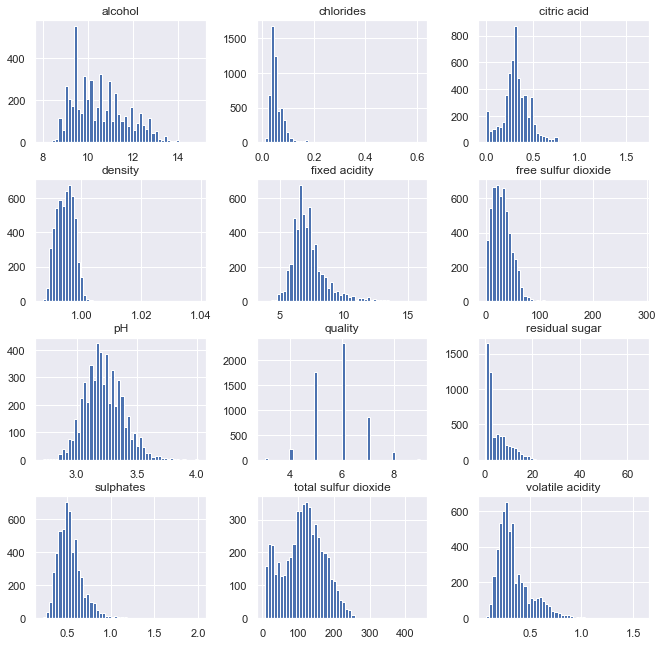

In [42]:
fig, ax = plt.subplots(figsize=(11, 11))

wine.hist(bins=50, ax=ax)

In [46]:
skew = wine.skew()

pd.DataFrame(data=skew, columns=["Skew"])

,Skew
fixed acidity,1.652781
volatile acidity,1.507233
citric acid,0.484621
residual sugar,1.703332
chlorides,5.342049
free sulfur dioxide,1.358640
total sulfur dioxide,0.061697
density,0.664751
pH,0.391993
sulphates,1.810185


In [47]:
# Lets get some summary statistics of the numerical data
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000
mean,7.216166,0.344042,0.318733,5.053068,0.056665,30.060143,114.189341,0.994536,3.224410,0.533250,10.548539,5.796022
std,1.317988,0.168115,0.147075,4.503336,0.036838,17.815588,56.781422,0.002966,0.160141,0.149669,1.186134,0.879922
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,75.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994640,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.000000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [48]:
# Summary statistics on object data
wine.describe(exclude = np.number)

,type
count,5329
unique,2
top,white
freq,3970


#### Check for physicochemical properties correlation with each other

In [49]:
# Look at correlation matrix
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.215179,0.328935,-0.104640,0.288977,-0.281674,-0.327321,0.477843,-0.270243,0.305774,-0.102794,-0.080519
volatile acidity,0.215179,1.000000,-0.383085,-0.164101,0.367336,-0.349350,-0.401468,0.307123,0.245786,0.225936,-0.064878,-0.264294
citric acid,0.328935,-0.383085,1.000000,0.146574,0.055010,0.132168,0.195102,0.094874,-0.343166,0.060413,-0.005575,0.098769
residual sugar,-0.104640,-0.164101,0.146574,1.000000,-0.123265,0.399024,0.487479,0.521663,-0.233907,-0.174803,-0.306222,-0.057414
chlorides,0.288977,0.367336,0.055010,-0.123265,1.000000,-0.186833,-0.270016,0.371447,0.026329,0.404483,-0.269121,-0.202226
free sulfur dioxide,-0.281674,-0.349350,0.132168,0.399024,-0.186833,1.000000,0.720666,0.006687,-0.141342,-0.198379,-0.170396,0.054456
total sulfur dioxide,-0.327321,-0.401468,0.195102,0.487479,-0.270016,0.720666,1.000000,0.007359,-0.222502,-0.274639,-0.249597,-0.050387
density,0.477843,0.307123,0.094874,0.521663,0.371447,0.006687,0.007359,1.000000,0.034138,0.282236,-0.668216,-0.326978
pH,-0.270243,0.245786,-0.343166,-0.233907,0.026329,-0.141342,-0.222502,0.034138,1.000000,0.166361,0.097370,0.039937
sulphates,0.305774,0.225936,0.060413,-0.174803,0.404483,-0.198379,-0.274639,0.282236,0.166361,1.000000,-0.017896,0.041462


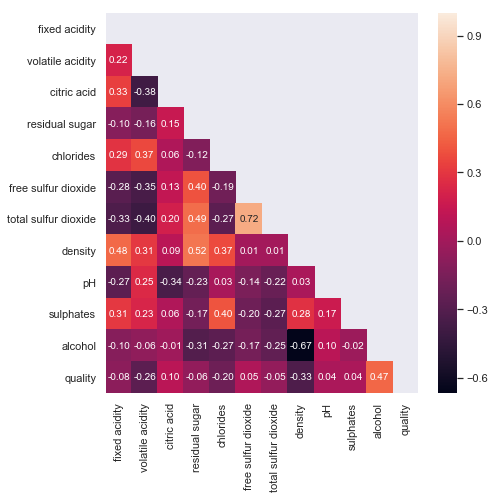

In [50]:
# Visualize the matrix on a heatmap
mask = np.triu(wine.corr())
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(data=wine.corr(), annot=True, fmt=".2f", ax=ax, mask=mask)

#### Observations
* An increase in the amount of citric acid results to a drop in volatile acidity
* An increase in the amount of chloride results to an increase in the volatile and fixed acidity
* An increase in the amount of FSO2 an TSO2 results to a decrease in volatile and fixed acidity
* An increase in the amount of FSO2 and TSO2 result to an increase in the amount of residual sugars
* FSO2 and TSO2 have a high correlation and potray similar information. An increase in one results to an increase in the other
* The higher the amount of fixed and volatile acidity the higher the wine density
* High amounts of residual sugars result to an increase in the wine density
* Higher chloride amounts result to an increase in the wine density
* Drill deeper into the impact of acidity and the pH. An increase in fixed acidity and citric acid result to a decrease in pH while an increase in volatile acidity results to a higher pH
* An increase in sulphates results to an increase in fixed and volatile acidity
* An increase in sulphates results to an increase in chlorides
* Sulphates seem to help raise the density of the wine
* An increase in alcohol results to a decrease in residual sugars
* An increase in alcohol results to a decrease in chlorides
* Higher amounts of alcohol results to a decrease in wine density

#### Observations Research:

* **An increase in the amount of citric acid results to a drop in volatile acidity**
    - Citric acid is added to wine after primary alcohol fermentation is complete. This is mainly due to the tendency of yeast to convert citric sugars into acetic acid (a volatile acid)
    
    
* **An increase in the amount of FSO2 an TSO2 results to a decrease in both volatile and fixed acidity**
    - With low acidity, wines become less stable. Sulfites are added to lower acidity wines to help stabilize them from bacterial growth and increase shelf life. Wines with no added sulfites have a shorter shelf life and therefore need to have a higher acidity (lower pH) which acts as a natural preservative.
    
    
* **An increase in the amount of FSO2 and TSO2 result to an increase in the amount of residual sugars**
    - Residual sugars are what remains after fermentation has occured. To prevent future fermentation of this sugars after bottling of the wine, sulfites are added to stabilize the wine and prevent secondary fermentation which may result to bottle explosion
    
    
* **The higher the amount of fixed and volatile acidity the higher the wine density**
    - The most prevalent fixed acids in wine are tartaric acid, malic acid and citric acid. Acetic acid is the most prevalent volatile acid Looking at their individual densities, they are all denser than water with tartaric acid having a density of 1.79 g/cm^3, citric acid of 1.67g/cm^3, malic acid at 1.61g/cm^3 and acetic acid at 1.05g/cm^3. Its this property of the acids that has a positive influence on the density of the wine
    
    
* **High amounts of residual sugars and chlorides result to an increase in the wine density**
    - Residual sugars increase the density of wine since more soluble solids i.e. sugars and salts are filling up the space between the water molecules.
 
 
* **An increase in fixed acidity and citric acid result to a decrease in pH while an increase in volatile acidity results to a higher pH**
    - Fixed acids (tartaric, malic and citric) are added to wine to increase its acidity i.e. lower the wine's pH level which help to not only add flavor to the wine but help in preserving it since most bacteria dont survive in high acidic environments. Volatile acidity is an indicator of wine spoilage which means there are bacteria in the wine converting some of the fixed acids (tartaric and citric acid) and residual sugars to acetic acid. These bacteria survive in a less acidic (high pH levels above 3.6) environment hence the increase in the wine's pH levels
    
    
* **An increase in sulphates results to an increase in fixed and volatile acidity**


* **An increase in alcohol results to a decrease in residual sugars**
    - Residual sugars are a by product of the fermentation process. These are the remains after most of the sugars have been converted into alcohol (ethanol) by the yeast. The more sugars converted in the process the higher the alcohol content of the wine hence few sugars remain unconverted.
    
    
* **An increase in alcohol results to a decrease in chlorides**


* **Higher amounts of alcohol results to a decrease in wine density**
    - The density of alcohol (ethanol) is 0.789g/cm^3. This makes alcohol less denser than water with a density of 1g/cm^3. The higher the alcohol content in wine, then the lighter (less dense) the wine will be.

#### Look at how the physicochemical properties correlate with the quality of the wine

In [51]:
from ipywidgets import widgets

In [52]:
# Check how each feature relate to the quality
def plot_boxplot(feature):
    sns.boxplot(data=wine, x="quality", y=feature)

cols_dict = {col: col for col in wine.columns}

widgets.interact(plot_boxplot, feature=cols_dict)

interactive(children=(Dropdown(description='feature', options={'type': 'type', 'fixed acidity': 'fixed acidity', 'volatile acidity': 'volatile acidity', 'citric acid': 'citric acid', 'residual sugar': 'residual sugar', 'chlorides': 'chlorides', 'free sulfur dioxide': 'free sulfur dioxide', 'total sulfur dioxide': 'total sulfur dioxide', 'density': 'density', 'pH': 'pH', 'sulphates': 'sulphates', 'alcohol': 'alcohol', 'quality': 'quality'}, value='type'), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_boxplot>

#### Observations
* Slight decrease in fixed acidity as wine quality increases with exception of highest quality wine
* wine quality increases as volatile acidity decreases
* wine quality increases as chlorides amount decreases 
* Quality increases with an increase in FSO2
* Quality increases with an decrease in TSO2
* Quality increases with a decrease in density
* Quality increases with a increase in alcohol content

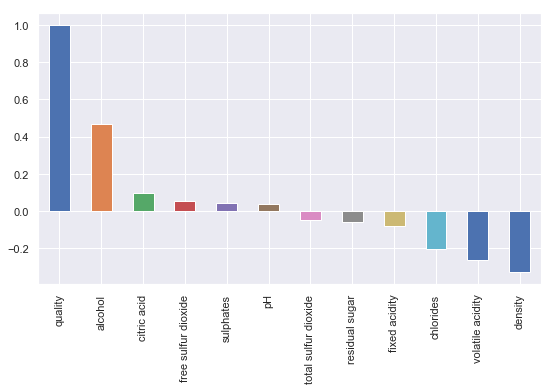

In [119]:
# Bar plot to visualize what physicochemical properties correlate more with the quality
fig, ax = plt.subplots(figsize=(9,5))
wine.corr()["quality"].sort_values(ascending=False).plot(kind="bar", ax=ax)

#### Since FSO2 and TSO2 represent almost similar thing, we'll do some little feature engineering and create a new feature FSO2_percentage in TSO2

In [120]:
# FSO2 and TSO2 have a high correlation and potray similar information. An increase in one results to an increase in the other
wine["FSO2_percentage"] = wine["free sulfur dioxide"] / wine["total sulfur dioxide"]

In [121]:
# Add a new column to the copy
# wine_copy["FSO2_percentage"] = wine_copy["free sulfur dioxide"] / wine_copy["total sulfur dioxide"]

In [122]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,FSO2_percentage
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.264706
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.106061
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.309278
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.252688
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0.220588


In [123]:
# distribution of physicochemical properties in red and white wine
def plot_typeDistribution(feature):
    sns.boxplot(data=wine, x="type", y=feature)
    
cols_dict = {col: col for col in wine.drop("type", axis=1).columns}
    
widgets.interact(plot_typeDistribution, feature=cols_dict)

interactive(children=(Dropdown(description='feature', options={'fixed acidity': 'fixed acidity', 'volatile acidity': 'volatile acidity', 'citric acid': 'citric acid', 'residual sugar': 'residual sugar', 'chlorides': 'chlorides', 'free sulfur dioxide': 'free sulfur dioxide', 'total sulfur dioxide': 'total sulfur dioxide', 'density': 'density', 'pH': 'pH', 'sulphates': 'sulphates', 'alcohol': 'alcohol', 'quality': 'quality', 'FSO2_percentage': 'FSO2_percentage'}, value='fixed acidity'), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_typeDistribution>

#### Observations:
* Red wine has a higher fixed acidity and volatile acidity than white wine
* White wine has more citric acid than red wine
* White wine is more sweeter than red wine
* Red wine has more chlorides (results to a salty taste) than white wine.
* White wine has more FSO2 and TSO2 than red wine
* Red wine is more denser than white wine
* Red wine is less acidic i.e. has a higher pH than white wine
* Red wine has more sulphates than white wine
* White wine has a slightly higher alcohol content than red wine
* Red wine has a higher FSO2 proportion than white wine

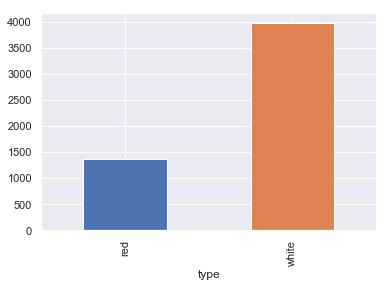

In [124]:
# Check the distribution of wine type
wine_type_group = wine.groupby("type")["type"].count()
wine_type_group.plot(kind="bar")

In [125]:
# What's the average composition (median) of the physicochemical properties in red and white wines?
wine.groupby("type").median()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,FSO2_percentage
type,,,,,,,,,,,,,
red,7.9,0.52,0.26,2.2,0.079,14.0,38.0,0.9967,3.31,0.62,10.2,6,0.375000
white,6.8,0.26,0.32,4.7,0.042,33.0,133.0,0.9935,3.18,0.48,10.4,6,0.252213


In [126]:
# What physicochemical properties define quality wine
wine.groupby("quality").median()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,FSO2_percentage
quality,,,,,,,,,,,,
3,7.45,0.415,0.33,3.15,0.0550,17.0,102.5,0.995900,3.245,0.505,10.15,0.250842
4,7.00,0.385,0.26,2.20,0.0505,15.0,98.0,0.994985,3.225,0.490,10.10,0.192539
5,7.10,0.340,0.30,2.80,0.0530,27.0,124.0,0.995920,3.200,0.510,9.60,0.253086
6,6.90,0.270,0.31,2.80,0.0460,29.0,116.0,0.994400,3.220,0.520,10.50,0.272727
7,6.80,0.280,0.32,2.60,0.0390,29.0,111.0,0.992160,3.240,0.520,11.50,0.294118
8,6.80,0.280,0.33,3.80,0.0360,32.0,114.0,0.991700,3.240,0.490,12.20,0.295238
9,7.10,0.270,0.36,2.20,0.0310,28.0,119.0,0.990300,3.280,0.460,12.50,0.274336


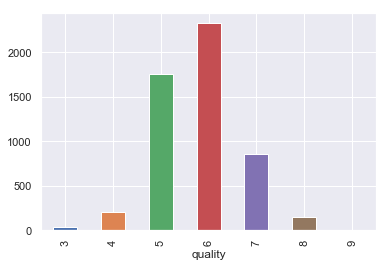

In [127]:
# Look at the distribution of classes i.e. quality in wine data
wine.groupby("quality")["quality"].count().plot(kind="bar")

#### Observation:
* More classes lie in the middle range. Most of the wine was of average quality with very few lying in both ends i.e. bad quality and good quality


* The is clearly a class imbalance here which might affect the models perfomance so we'll have to address this when doing some feature engineering

### Feature Engineering

#### Bin the wines based on their alcohol content

#### Bins:
* Low < 10
* Medium - Low 10 - 11.5
* Medium 11.5 - 13.5
* Medium - High > 13.5 - 14.5
* High > 14.5

In [128]:
wine["alcohol_content"] = wine["alcohol"].apply(lambda x: 0 if x <= 10 else(1 if x > 10 and x <= 11.5 else(2 if x > 11.5 and x <= 13.5 else(3 if x > 13.5 and x <= 14.5 else(4 if x > 14.5 else x)))))

#### Look at the distribution of the new column alcohol_content

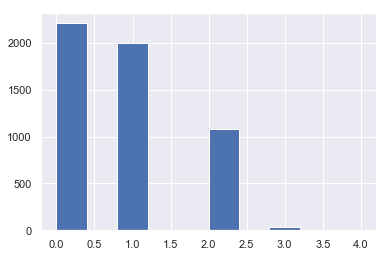

In [129]:
wine["alcohol_content"].hist()

#### Bin the target feature since the data is highly imbalanced

##### Using the 5 point scale (by John Platter), convert the points and follow the guide below:
* 5 = classic
* 4 = excellent
* 3 = average
* 2 = casual quaffing
* 1 = very ordinary

#### Bin the results to 2 major groups <= 3 as average and > 3 as good/ excellent

In [130]:
import math

In [131]:
# Convert the rating to a 5 point scale and drop the quality feature. 

wine["wine_rating"] = wine["quality"].apply(lambda x: 0 if math.ceil(x / 2) <=3 else(1 if math.ceil(x / 2) > 3 else x))
wine.drop("quality", axis = 1, inplace=True)

In [132]:
wine["wine_rating"].value_counts().sort_index()

0    4318
1    1011
Name: wine_rating, dtype: int64

#### Look at the distribution of the new feature

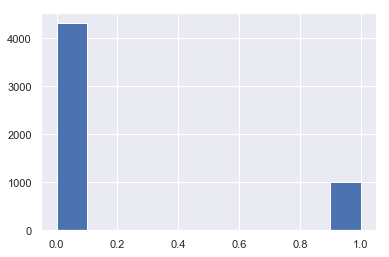

In [133]:
wine["wine_rating"].hist()

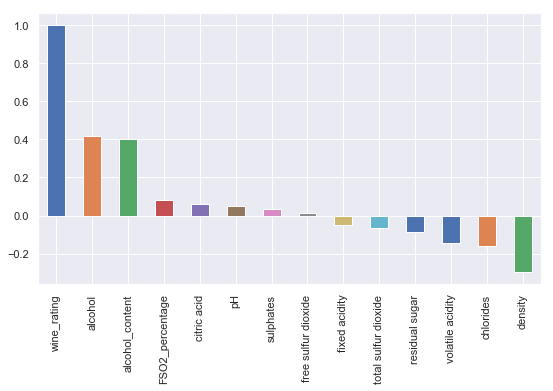

In [134]:
# Bar plot to visualize what physicochemical properties correlate more with the wine_rating
fig, ax = plt.subplots(figsize=(9,5))
wine.corr()["wine_rating"].sort_values(ascending=False).plot(kind="bar", ax=ax)

#### Create new feature: citric_acid_proportion

#### Calculate the proportion of citric acid in the wine's fixed acidity

In [135]:
wine["citric_acid_proportion"] = wine["citric acid"] / wine["fixed acidity"]

#### Look at the distribution of the new feature (citric_acid_proportion)

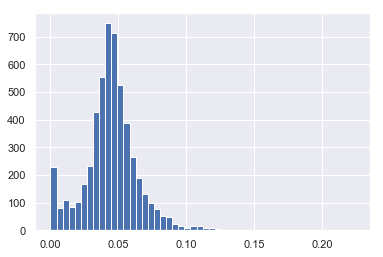

In [136]:
wine["citric_acid_proportion"].hist(bins=50)

#### Create new feature: total_acidity

In [137]:
wine["total_acidity"] = wine["fixed acidity"] + wine["volatile acidity"]

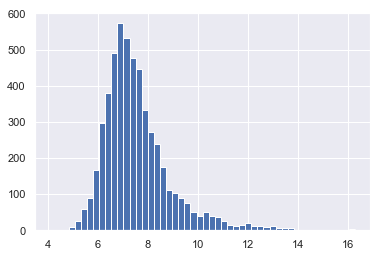

In [138]:
wine["total_acidity"].hist(bins=50)

#### Transform the features to a more Gaussian distribution since most of them seem to be right skewed and peaked

#### We'll use the Yeo-Johnson power transform since it allows for zero values and calculates the best value of lambda for our transformation to be more Gaussian like

In [139]:
from sklearn.preprocessing import PowerTransformer

In [140]:
power_transform = PowerTransformer(method="yeo-johnson", standardize=False)

# Drop the type(categorical data) and quality(target) from then tranform remaining columns
for col in wine.drop(["type", "wine_rating"], axis=1).columns:
    wine[col] = power_transform.fit_transform(wine[col].values.reshape(-1,1))

#### Check to see how the data is now distributed

C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029418FE05C0>,
      dtype=object)

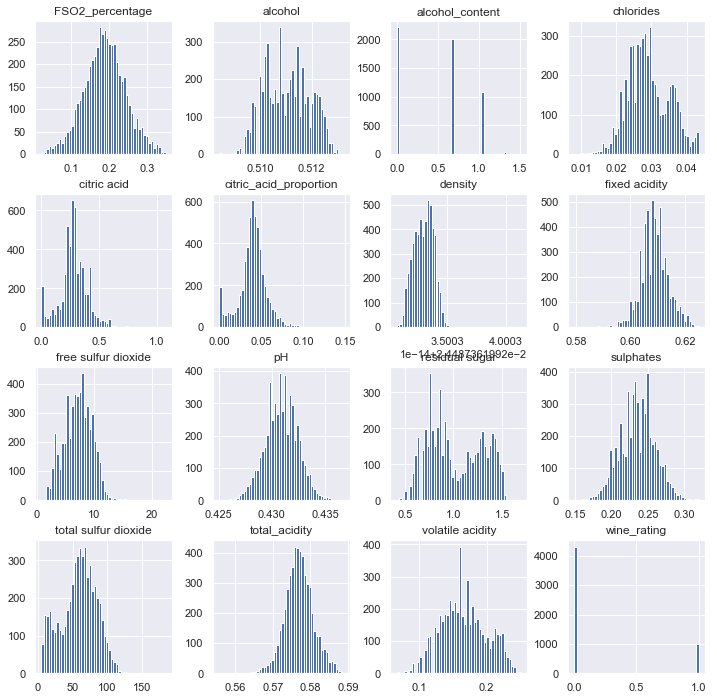

In [141]:
fig, ax = plt.subplots(figsize=(12, 12))

wine.hist(bins=50, ax=ax)

#### Observation:
* The data looks way better now with a Gaussian (normal) like distribution. This has helped remove most values in the extreme ends

#### Scale features since they are on different scales

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
scaler = StandardScaler()

for col in wine.drop(["wine_rating", "type"], axis=1).columns:
    wine[col] = scaler.fit_transform(wine[col].values.reshape(-1,1))

#### Encode categorical features

In [146]:
from sklearn.preprocessing import OneHotEncoder

In [147]:
# Encode the type of wine
onehot_enc = OneHotEncoder(sparse=False)
wine["type"] = onehot_enc.fit_transform(wine["type"].values.reshape(-1,1))

### Model the Data

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
# Split the data into a train and test set
X = wine.drop("wine_rating", axis=1)
# X = X[features]
y = wine["wine_rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Resample the data to reduce the class imbalances 

In [150]:
# from imblearn.over_sampling import SMOTE

In [151]:
# Combine the train data for oversampling
# train = pd.concat([X_train, y_train], axis=1)

In [152]:
# Use the SMOTE algorithm to oversample
# X_train_res, y_train_res = SMOTE(k_neighbors=2, random_state=0).fit_resample(X_train, y_train)

In [153]:
# X_train_res.shape

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, log_loss

#### Define a function to calculate the scores

In [155]:
def scores(y_test, y_preds, clf):
    print("Classification Report: \n{}".format(classification_report(y_test, y_preds)))
    
    cm = confusion_matrix(y_test, y_preds)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt="g", cmap='Blues') 
    
#     labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix') 
    ax.xaxis.set_ticklabels(clf.classes_)
    ax.yaxis.set_ticklabels(clf.classes_)

#### LogisticRegression

In [156]:
logistic_params = {}

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       863
           1       0.55      0.26      0.35       203

    accuracy                           0.82      1066
   macro avg       0.70      0.60      0.62      1066
weighted avg       0.79      0.82      0.79      1066



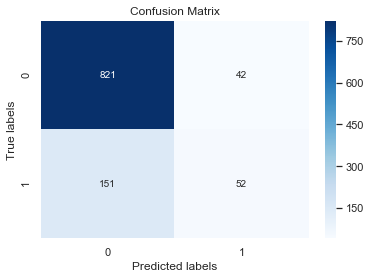

In [173]:
# Define an empty dictionary to hold the models parameters
logistic = LogisticRegression(**logistic_params)
logistic.fit(X_train, y_train)

y_preds = logistic.predict(X_test)

scores(y_test, y_preds, logistic)

#### Decision Tree

In [174]:
tree_params = {}

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       863
           1       0.40      0.40      0.40       203

    accuracy                           0.77      1066
   macro avg       0.63      0.63      0.63      1066
weighted avg       0.77      0.77      0.77      1066



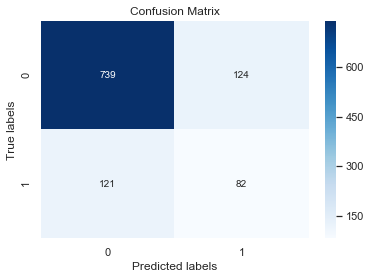

In [175]:
tree = DecisionTreeClassifier(**tree_params)
tree.fit(X_train, y_train)

y_preds = tree.predict(X_test)
scores(y_test, y_preds, tree)

#### Random Forest

In [160]:
forest_params = {}

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       863
           1       0.59      0.33      0.42       203

    accuracy                           0.83      1066
   macro avg       0.72      0.64      0.66      1066
weighted avg       0.81      0.83      0.81      1066



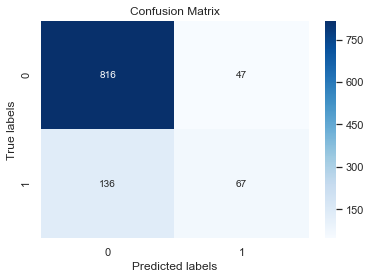

In [161]:
forest = RandomForestClassifier(**forest_params)
forest.fit(X_train, y_train)

y_preds = forest.predict(X_test)
scores(y_test, y_preds, forest)

#### Gradient Boosting

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       863
           1       0.58      0.35      0.44       203

    accuracy                           0.83      1066
   macro avg       0.72      0.65      0.67      1066
weighted avg       0.81      0.83      0.81      1066



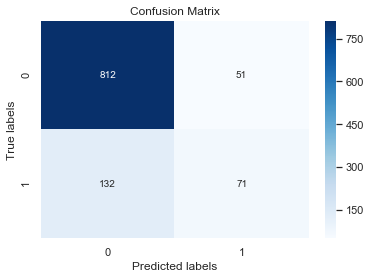

In [162]:
gboost_params = {}

gboost = GradientBoostingClassifier(**gboost_params)
gboost.fit(X_train, y_train)

y_preds = gboost.predict(X_test)
scores(y_test, y_preds, gboost)

#### KNN

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       863
           1       0.57      0.43      0.49       203

    accuracy                           0.83      1066
   macro avg       0.72      0.68      0.70      1066
weighted avg       0.82      0.83      0.82      1066



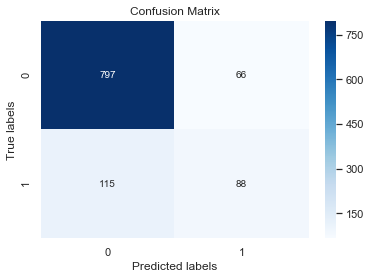

In [163]:
knn_params = {}

knn = KNeighborsClassifier(**knn_params)
knn.fit(X_train, y_train)

y_preds = knn.predict(X_test)
scores(y_test, y_preds, knn)

#### SVC

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       863
           1       0.61      0.28      0.39       203

    accuracy                           0.83      1066
   macro avg       0.73      0.62      0.64      1066
weighted avg       0.80      0.83      0.80      1066



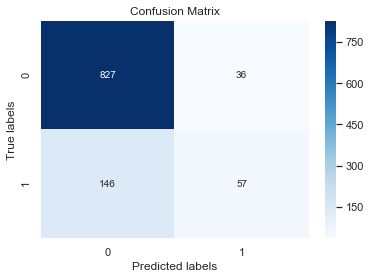

In [164]:
svc_params = {}

svc = SVC()
svc.fit(X_train, y_train)

y_preds = svc.predict(X_test)
scores(y_test, y_preds, svc)

### Feature Selection

#### Logistic Regression

#### Decision Tree

In [165]:
tree_importance = pd.DataFrame(list(zip(wine.drop("wine_rating", axis=1).columns,np.round(np.divide(tree.feature_importances_, np.sum(tree.feature_importances_)) * 100, decimals=2))), columns=["Feature", "Importance"])
tree_importance

,Feature,Importance
0,type,0.00
1,fixed acidity,2.77
2,volatile acidity,6.40
3,citric acid,4.16
4,residual sugar,6.74
5,chlorides,6.53
6,free sulfur dioxide,4.16
7,total sulfur dioxide,7.47
8,density,6.67
9,pH,7.99


#### Random Forest

In [166]:
forest_importance = pd.DataFrame(list(zip(wine.columns,np.round(np.divide(forest.feature_importances_, np.sum(forest.feature_importances_)) * 100, decimals=2))), columns=["Feature", "Importance"])
forest_importance

,Feature,Importance
0,type,0.16
1,fixed acidity,4.35
2,volatile acidity,6.59
3,citric acid,4.83
4,residual sugar,6.48
5,chlorides,6.75
6,free sulfur dioxide,5.32
7,total sulfur dioxide,6.40
8,density,8.74
9,pH,6.45


#### Gradient Boosting

In [167]:
gboost_importance = pd.DataFrame(list(zip(wine.columns,np.round(np.divide(gboost.feature_importances_, np.sum(gboost.feature_importances_)) * 100, decimals=2))), columns=["Feature", "Importance"])
gboost_importance

,Feature,Importance
0,type,0.21
1,fixed acidity,0.68
2,volatile acidity,6.47
3,citric acid,2.95
4,residual sugar,4.42
5,chlorides,4.86
6,free sulfur dioxide,3.15
7,total sulfur dioxide,3.16
8,density,3.43
9,pH,4.81


In [168]:
overall = pd.concat([tree_importance, forest_importance['Importance'], gboost_importance["Importance"]], axis=1)

total =  np.sum(tree_importance["Importance"]) + np.sum(forest_importance["Importance"]) + np.sum(gboost_importance["Importance"])

overall["overall_imp"] = overall.apply(lambda x: np.divide(np.sum(x.drop("Feature")), 300) * 100, axis=1)

features = overall.sort_values(by="overall_imp", ascending=False).iloc[: 11]["Feature"].values
print(features)

['alcohol' 'volatile acidity' 'FSO2_percentage' 'pH' 'density' 'sulphates'
 'chlorides' 'residual sugar' 'citric_acid_proportion'
 'total sulfur dioxide' 'free sulfur dioxide']


#### Observations:
**Top Features**
'alcohol' 
'FSO2_percentage' 
'density' 
'chlorides' 
'volatile acidity'
'sulphates' 
'pH' 
'residual sugar' 
'citric_acid_proportion'
'total sulfur dioxide'  
'citric acid'

### Hyperparameter Tuning

In [169]:
from sklearn.model_selection import GridSearchCV

#### Create a function to update the models' hyperparameters

In [170]:
def updateHyperparams(model, param_grid):
    gridsearch = GridSearchCV(estimator=model, 
                              param_grid=param_grid, 
                              scoring="accuracy",
                              cv=7,
                              n_jobs = 6,
                              verbose=1)
    
    gridsearch.fit(X_train, y_train)
    
    print(gridsearch.best_params_)
    
    return gridsearch.best_params_

#### Logistic Regression

In [171]:
grid = {"penalty": ['l1', 'l2', 'elasticnet', 'none'],
        "C": [0.0001, 0.001, 0.01, 0.1, 1, 10],
        "solver": ['newton-cg', 'lbfgs','sag', 'saga'], 
        "max_iter": [100, 200, 300, 400, 500]}

logistic_params = updateHyperparams(logistic, grid)

Fitting 7 folds for each of 480 candidates, totalling 3360 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 530 tasks      | elapsed:   12.1s
[Parallel(n_jobs=6)]: Done 1268 tasks      | elapsed:   27.3s
[Parallel(n_jobs=6)]: Done 2273 tasks      | elapsed:   50.0s
[Parallel(n_jobs=6)]: Done 3226 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 3349 out of 3360 | elapsed:  1.5min remaining:    0.2s


{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


[Parallel(n_jobs=6)]: Done 3360 out of 3360 | elapsed:  1.6min finished


#### Decision Tree

In [172]:
grid = {"splitter": ["best", "random"],
        "min_samples_split": [2,3,4,5,6,7,8,9,10,11,12,13],
        "max_features": ["auto", "sqrt", "log2"]}

tree_params = updateHyperparams(tree, grid)

Fitting 7 folds for each of 72 candidates, totalling 504 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.7s


{'max_features': 'auto', 'min_samples_split': 11, 'splitter': 'random'}


[Parallel(n_jobs=6)]: Done 493 out of 504 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 504 out of 504 | elapsed:    2.4s finished


#### Random Forest

In [80]:
grid = {"n_estimators": [100, 200, 300, 500, 1000],
        "min_samples_split": [2,3,4,5],
        "max_features": ["auto", "sqrt", "log2"]}

forest_params = updateHyperparams(forest, grid)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 7 folds for each of 60 candidates, totalling 420 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   34.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 420 out of 420 | elapsed:  6.9min finished


{'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 1000}


#### Gradient Boosting

In [ ]:
GradientBoostingClassifier?

In [ ]:
grid = {"n_estimators": [100, 200, 500],
        "min_samples_split": [2,3,5],
        "max_features": ["auto", "sqrt", "log2"]}

gboost_params = updateHyperparams(gboost, grid)

#### KNN

In [84]:
grid = {"weights": ["uniform", "distance"],
        "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_params = updateHyperparams(knn, grid)

Fitting 7 folds for each of 8 candidates, totalling 56 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  45 out of  56 | elapsed:    1.6s remaining:    0.3s


{'algorithm': 'auto', 'weights': 'distance'}


[Parallel(n_jobs=6)]: Done  56 out of  56 | elapsed:    2.0s finished


#### SVC

In [87]:
grid = {"C": [0.0001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
        "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
        "gamma": ['scale', 'auto']
       }

svc_params = updateHyperparams(svc, grid)

Fitting 7 folds for each of 56 candidates, totalling 392 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   23.4s
[Parallel(n_jobs=6)]: Done 392 out of 392 | elapsed:   52.1s finished


{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
